LA EMBAIXO TEM A INTERFACE COM GRADIO...

Biblioteca

In [ ]:
!pip install numpy matplotlib imageio


Ambiente: planta baixa e as posições de sujeira.

Configuração do ambiente

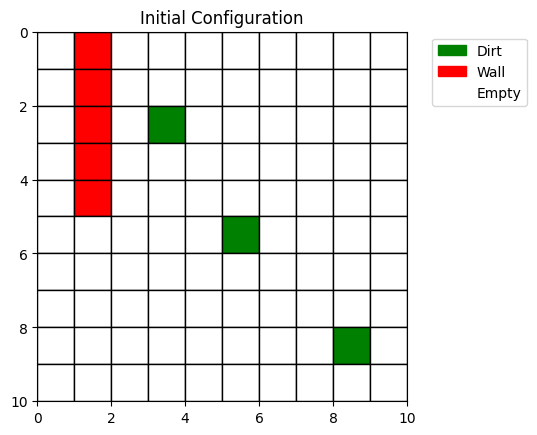

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Configuração da planta baixa
grid_size = (10, 10)
house = np.zeros(grid_size)
dirt_positions = [(2, 3), (5, 5), (8, 8)]
for dirt in dirt_positions:
    house[dirt] = 1  # 1 representa sujeira

# Paredes como obstáculos
walls = [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
for wall in walls:
    house[wall] = -1  # -1 representa uma parede

# Função para visualizar a configuração inicial
def draw_initial_grid(house):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == -1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title('Initial Configuration')
    plt.legend(handles=[
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Visualizando a configuração inicial
draw_initial_grid(house)


Aprendizado por reforço: Q-learning para treinar o robô aspirador.

Treinamento do robo aspirador: arrumar...convergindo muito rapido

Certificação de Posição Inicial: Garantimos que o robô não comece em uma posição de sujeira ou parede.
Limpeza da Sujeira: Após encontrar sujeira, o robô a limpa, atualizando a posição para 0

Reduzir a Taxa de Decaimento do Epsilon: Isso vai permitir que o robô explore por mais tempo antes de começar a explorar menos.
Reiniciar o Estado da Casa Periodicamente: Para garantir que a sujeira reapareça e o robô tenha novas oportunidades de aprender.
Verificar se o Robô Não Está Preso: Adicionar um mecanismo para garantir que o robô não está preso em um ciclo de estados inválidos.

Decaimento do Epsilon: A taxa de decaimento foi reduzida para 0.999, o que permitirá mais exploração.
Reinicialização do Estado da Casa: A casa é reiniciada a cada episódio para garantir que a sujeira esteja presente em cada novo episódio

Aumentar a taxa de aprendizado: Ajuste o alpha para 0.2 para ver se ele ajuda a aprender mais rapidamente.
Aumentar o fator de desconto: Ajuste o gamma para 0.95 para dar mais valor a recompensas futuras.
Adicionar mais aleatoriedade na escolha do estado inicial: Isso pode ajudar a variar mais as experiências de treinamento.

Reduzir a recompensa ao encontrar sujeira: Reduzir a recompensa direta pode fazer o robô se esforçar mais para aprender outras partes do ambiente.

Adicionar penalidades por movimento: Adicionar uma pequena penalidade por cada movimento pode incentivar o robô a encontrar sujeira de forma mais eficiente.

Aumentar a variação dos estados iniciais: Começar de uma maior variedade de posições iniciais pode ajudar o robô a explorar mais o ambiente.

Caso queira fazer mais ajustes ou explorar outras possibilidades, algumas sugestões poderiam incluir:

Alterar a taxa de aprendizado (alpha): Se você perceber que o robô está convergindo muito lentamente ou muito rapidamente, ajustar a taxa de aprendizado pode ajudar.

Adicionar mais sujeira ou obstáculos: Adicionar mais elementos no ambiente pode tornar o problema mais desafiador e interessante para o robô.

Testar diferentes políticas de exploração-exploração (epsilon): Experimente diferentes estratégias de decaimento de epsilon para encontrar um bom equilíbrio entre exploração e exploração.

Aumentar o número de episódios: Em alguns casos, treinar por mais episódios pode ajudar a melhorar ainda mais o desempenho do robô.

Episódio 0, Passo 96: Robô encontrou sujeira na posição (2, 3)!
Episódio 0 concluído com recompensa total: -8.699999999999982
Episódio 1, Passo 45: Robô encontrou sujeira na posição (5, 5)!
Episódio 2, Passo 3: Robô encontrou sujeira na posição (8, 8)!
Episódio 3, Passo 26: Robô encontrou sujeira na posição (8, 8)!
Episódio 4, Passo 4: Robô encontrou sujeira na posição (8, 8)!
Episódio 5, Passo 3: Robô encontrou sujeira na posição (5, 5)!
Episódio 6, Passo 16: Robô encontrou sujeira na posição (5, 5)!
Episódio 8, Passo 7: Robô encontrou sujeira na posição (2, 3)!
Episódio 9, Passo 0: Robô encontrou sujeira na posição (8, 8)!
Episódio 11, Passo 37: Robô encontrou sujeira na posição (5, 5)!
Episódio 12, Passo 4: Robô encontrou sujeira na posição (5, 5)!
Episódio 13, Passo 0: Robô encontrou sujeira na posição (5, 5)!
Episódio 14, Passo 10: Robô encontrou sujeira na posição (8, 8)!
Episódio 15, Passo 25: Robô encontrou sujeira na posição (2, 3)!
Episódio 16, Passo 11: Robô encontrou sujeir

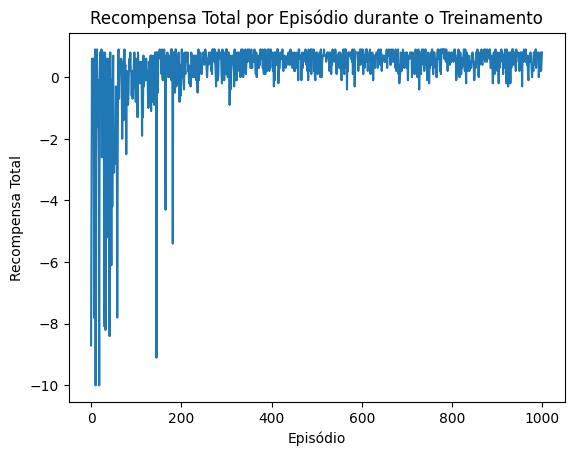

In [ ]:
import time
import imageio

# Inicializando a Q-Table
q_table = np.zeros((grid_size[0], grid_size[1], 4))  # 4 ações: cima, baixo, esquerda, direita

# Hiperparâmetros
alpha = 0.2  # Taxa de aprendizado
gamma = 0.95  # Fator de desconto
epsilon = 1.0  # Taxa de exploração inicial
epsilon_decay = 0.995  # Taxa de decaimento da exploração ajustada
epsilon_min = 0.1  # Taxa mínima de exploração
max_steps_per_episode = 100  # Limite de passos por episódio
move_penalty = -0.1  # Penalidade por cada movimento

# Funções auxiliares
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

# Função para reiniciar o estado da casa
def reset_house():
    house.fill(0)
    for dirt in dirt_positions:
        house[dirt] = 1
    for wall in walls:
        house[wall] = -1

# Treinando o robô
rewards_per_episode = []
for episode in range(1000):
    reset_house()  # Reinicia o estado da casa a cada episódio
    state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
    while not is_valid_state(state) or house[state] == 1:  # Certificando-se de que não começamos em uma parede ou sujeira
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

    steps = 0
    total_reward = 0
    while steps < max_steps_per_episode:
        action = choose_action(state)
        next_state = get_next_state(state, action)
        if is_valid_state(next_state):
            reward = house[next_state]
            q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
            state = next_state
            total_reward += reward + move_penalty
            if reward == 1:
                house[next_state] = 0  # Limpar a sujeira
                print(f"Episódio {episode}, Passo {steps}: Robô encontrou sujeira na posição {state}!")
                break
        steps += 1

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    if episode % 100 == 0:
        print(f"Episódio {episode} concluído com recompensa total: {total_reward}")

print("Treinamento concluído!")

# Plotando as recompensas por episódio
plt.plot(rewards_per_episode)
plt.xlabel('Episódio')
plt.ylabel('Recompensa Total')
plt.title('Recompensa Total por Episódio durante o Treinamento')
plt.show()


Simulacao e salvamento

Simulacao com metrica

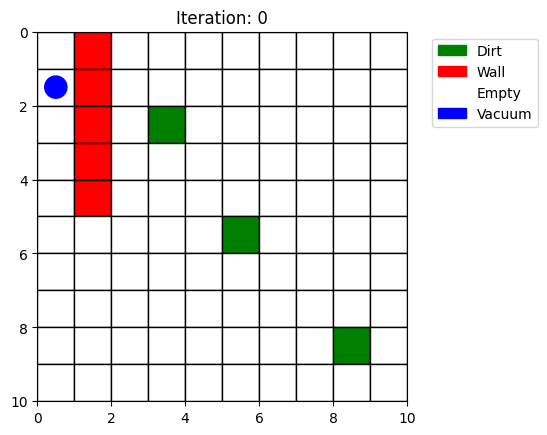

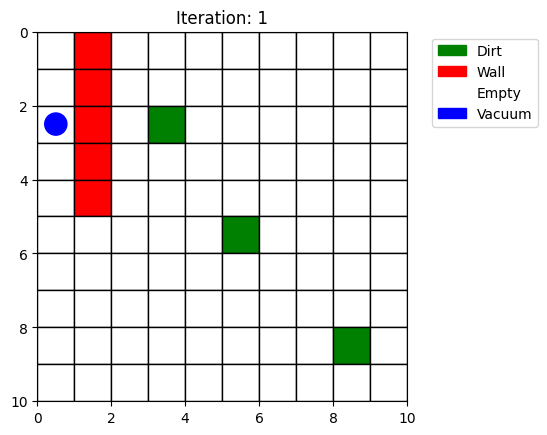

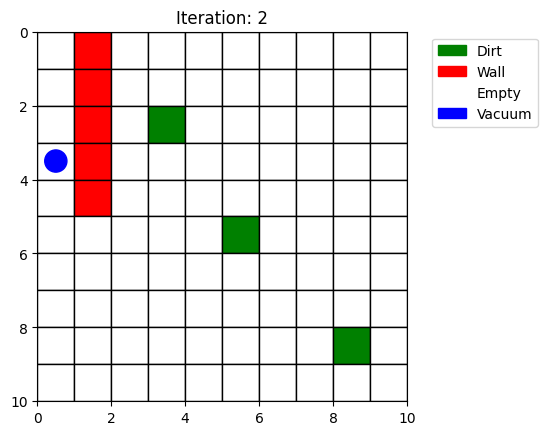

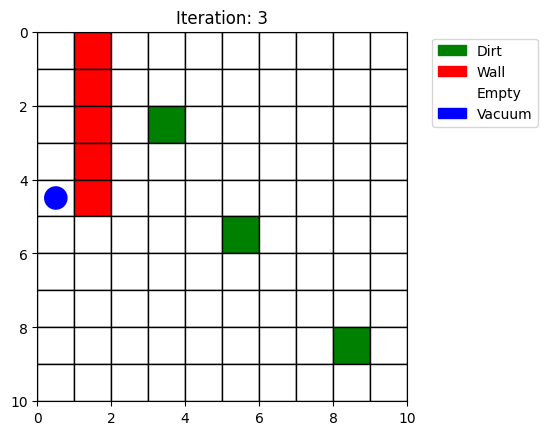

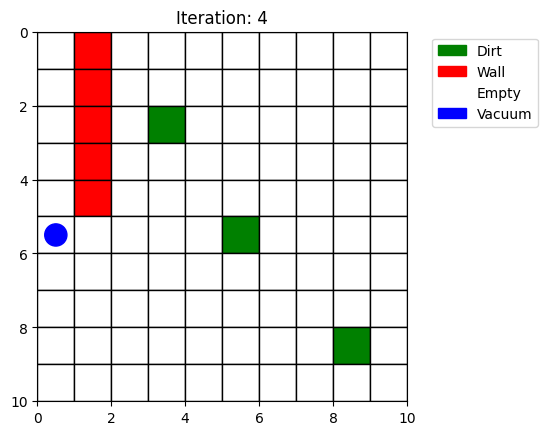

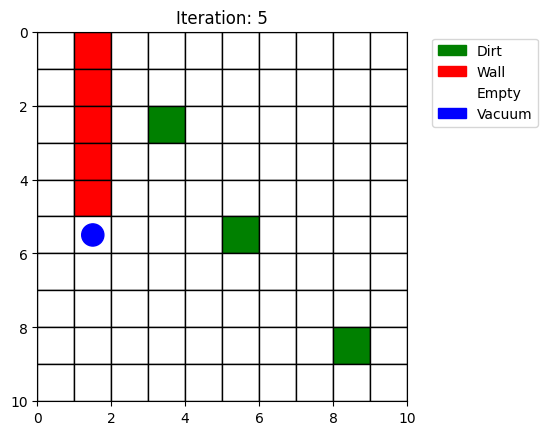

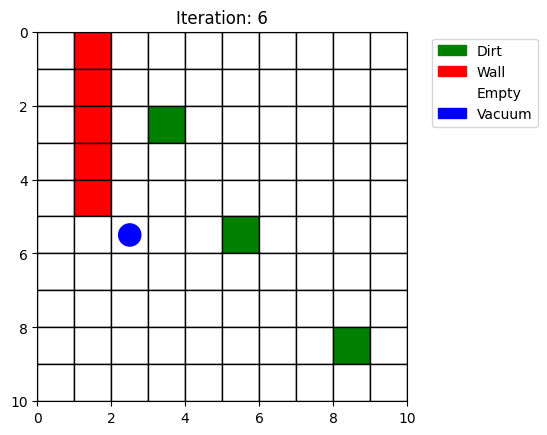

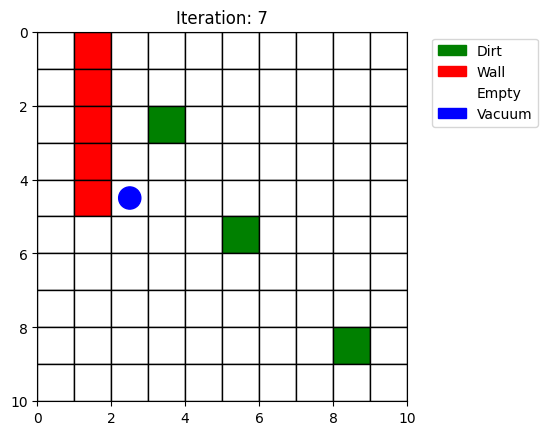

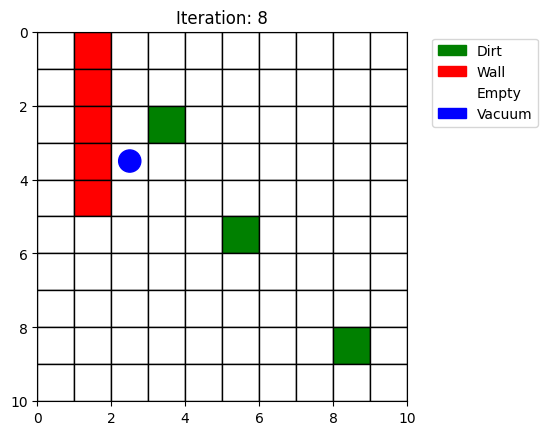

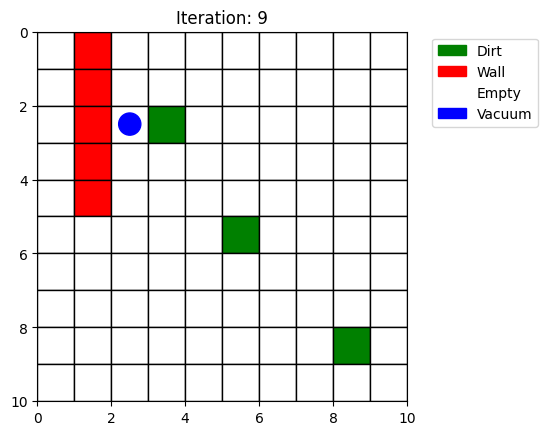

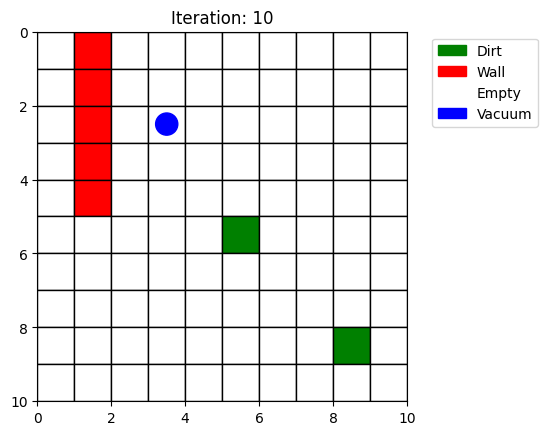

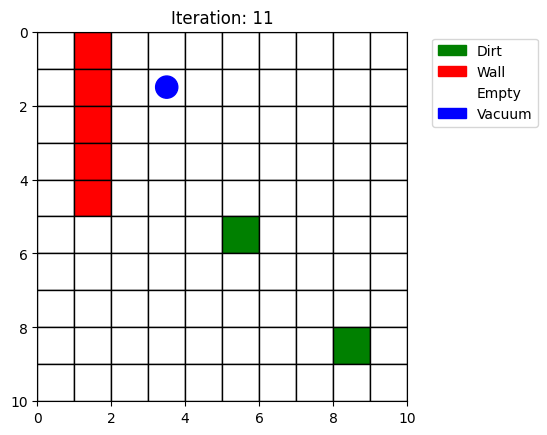

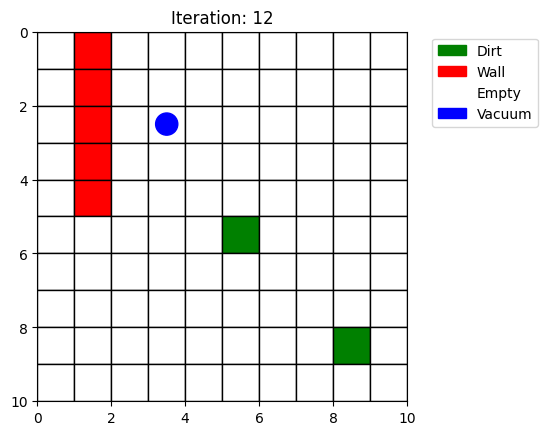

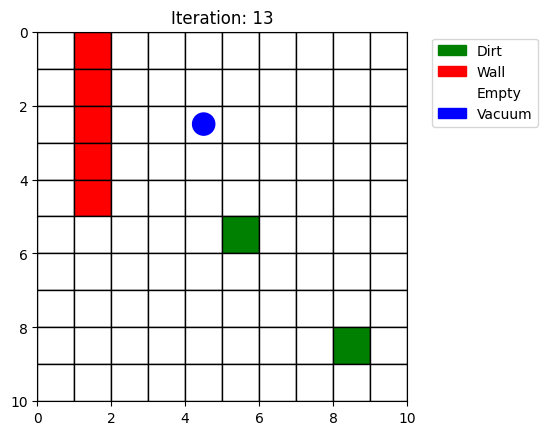

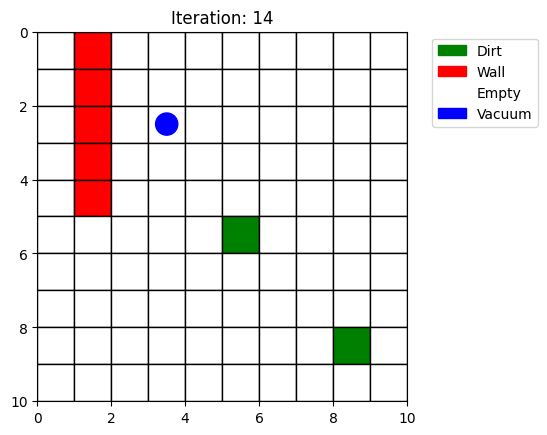

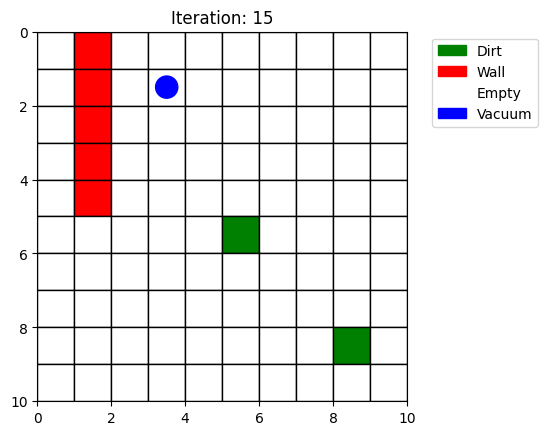

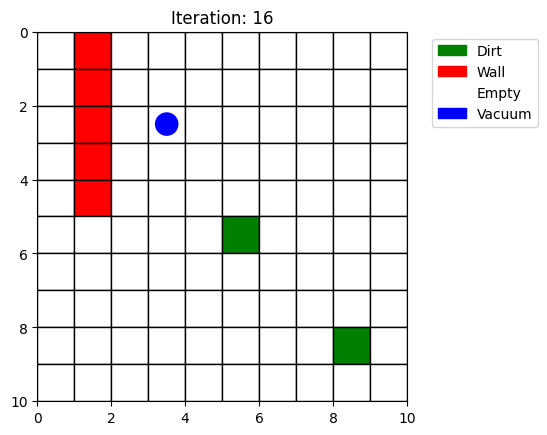

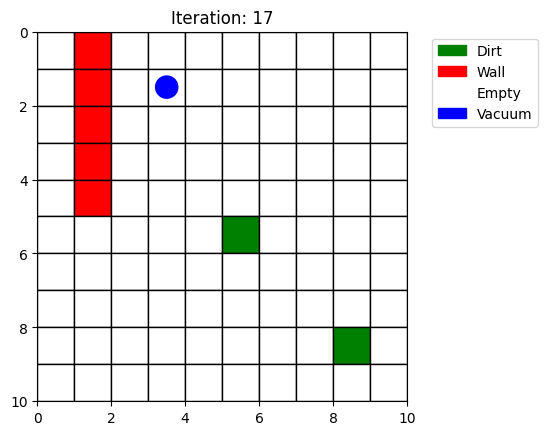

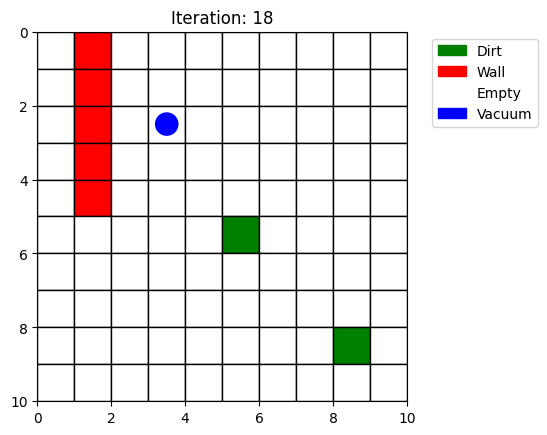

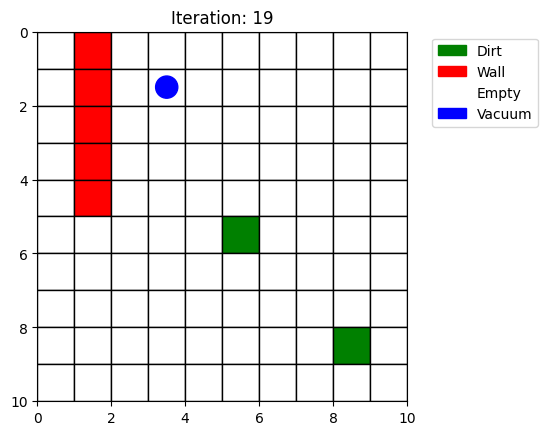

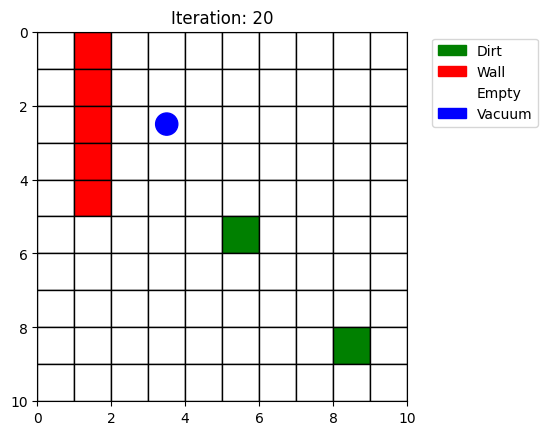

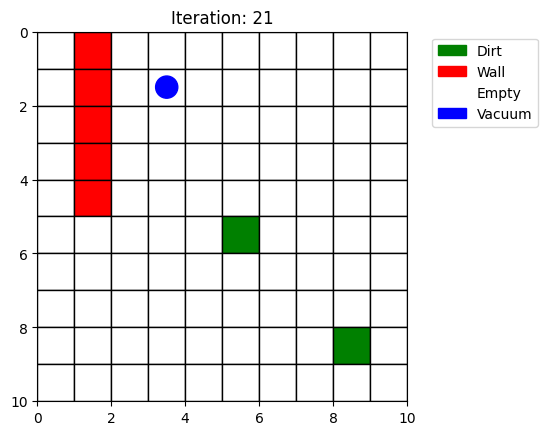

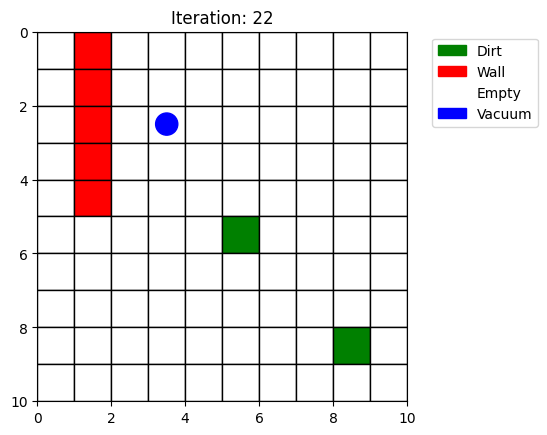

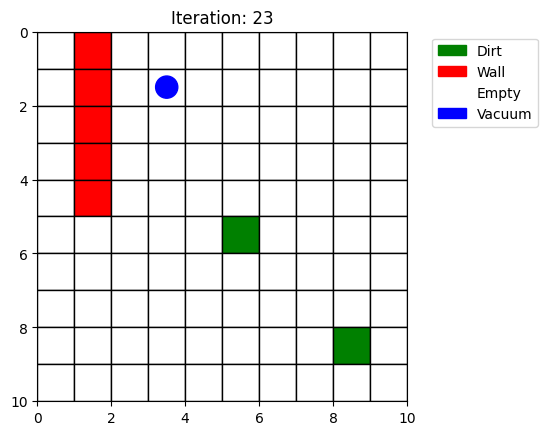

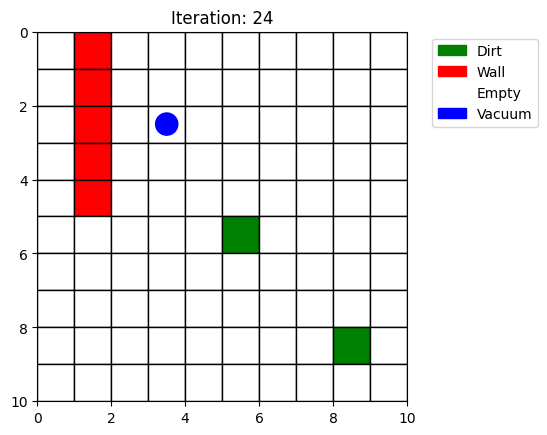

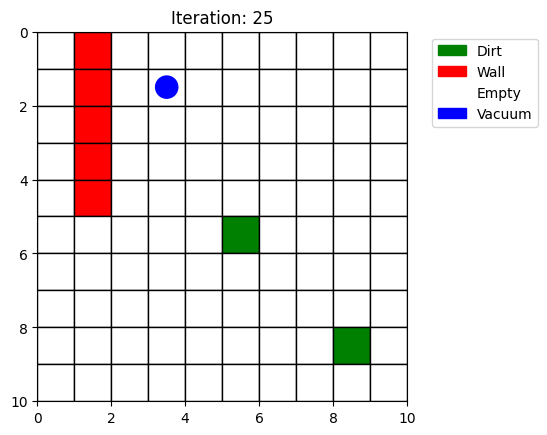

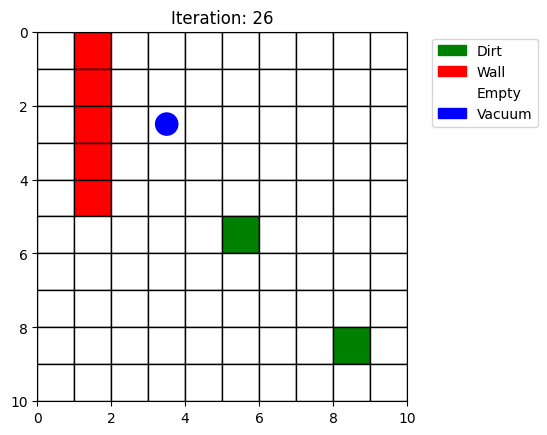

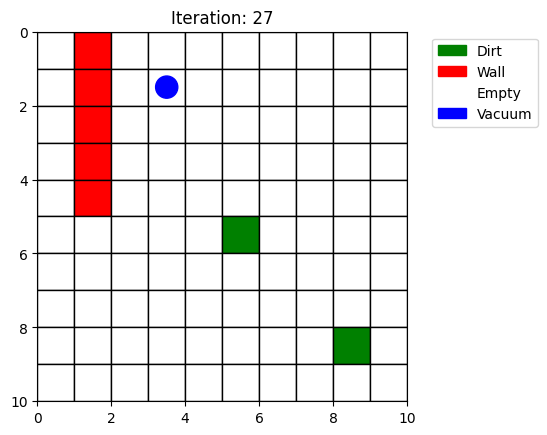

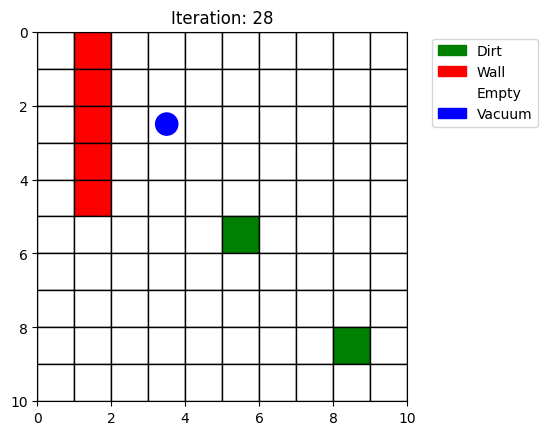

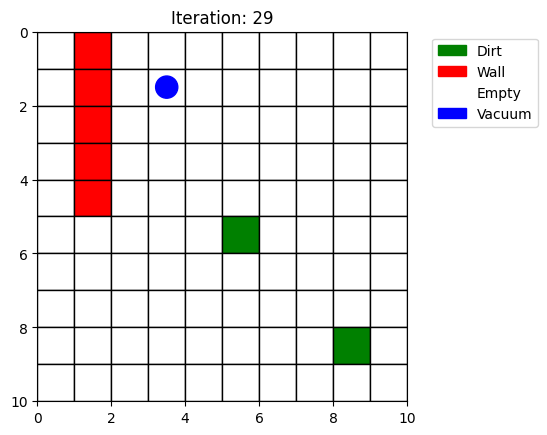

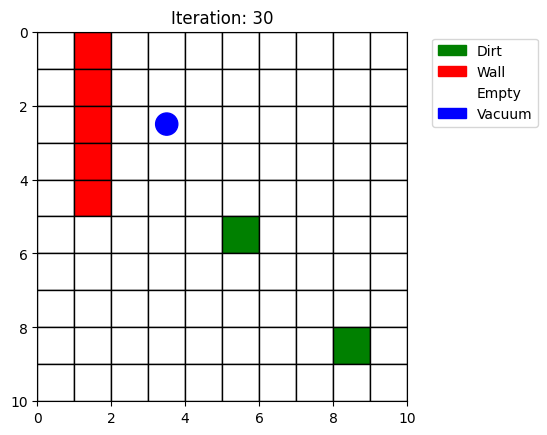

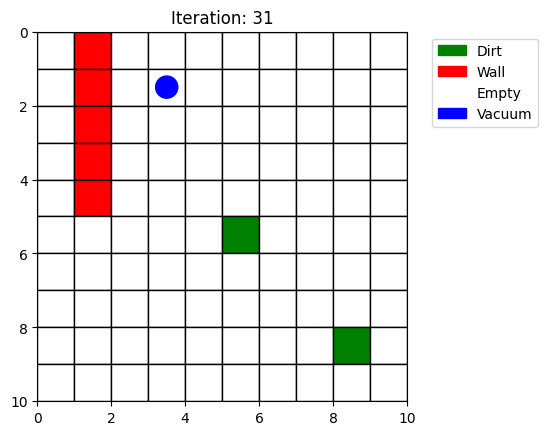

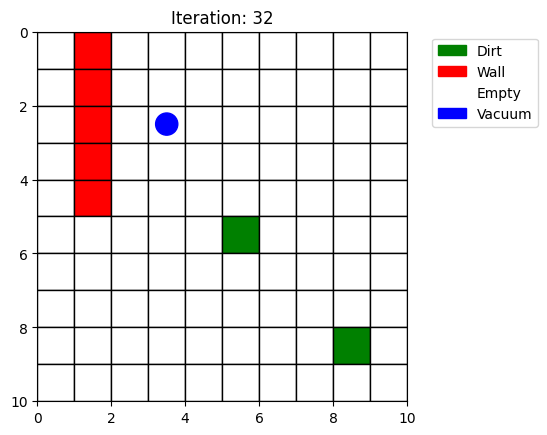

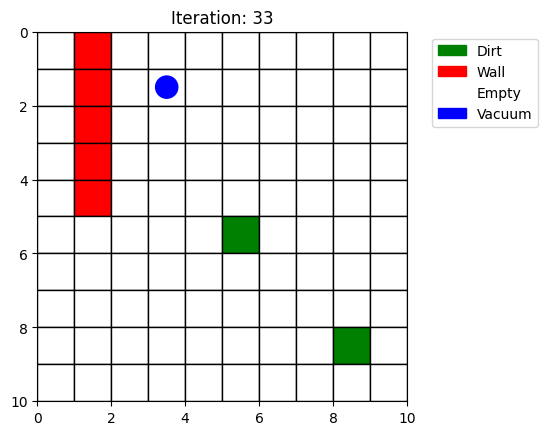

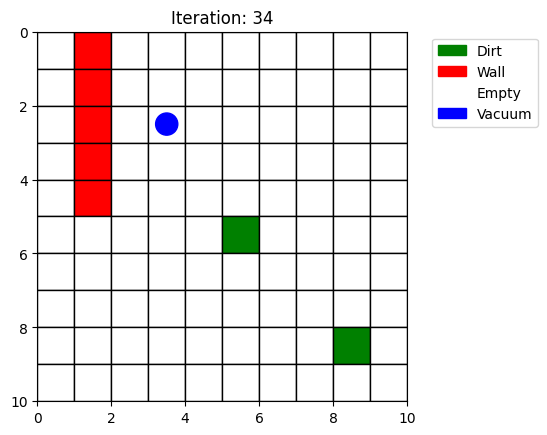

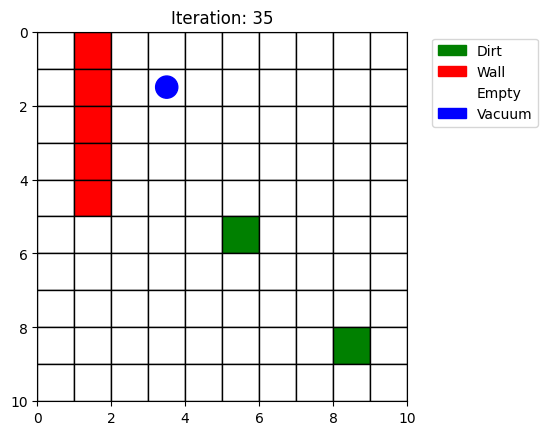

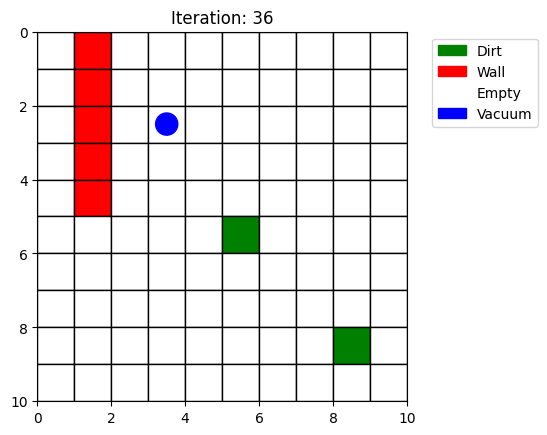

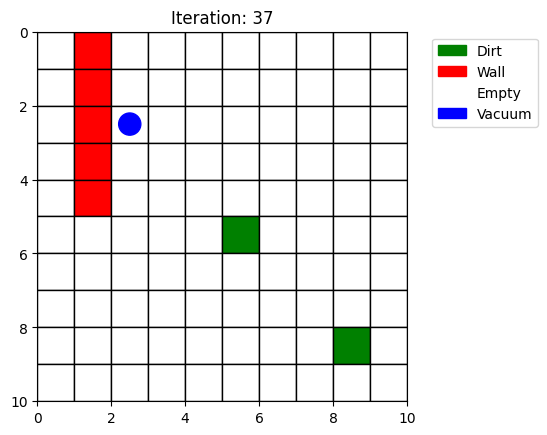

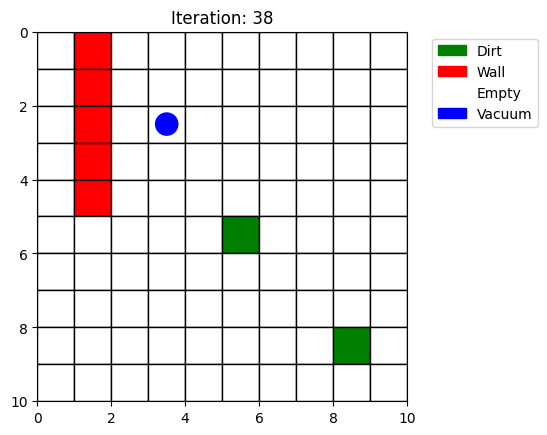

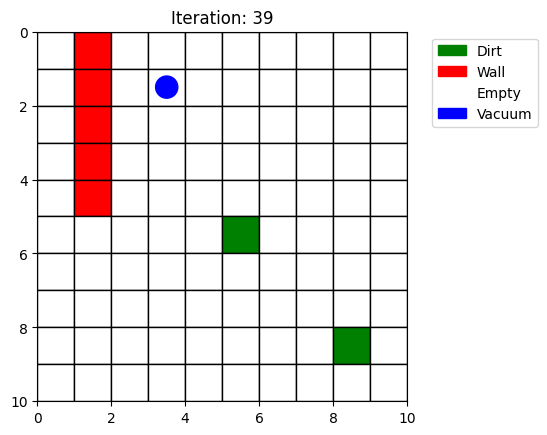

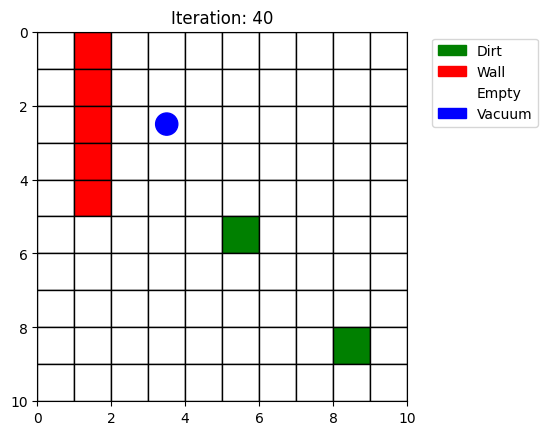

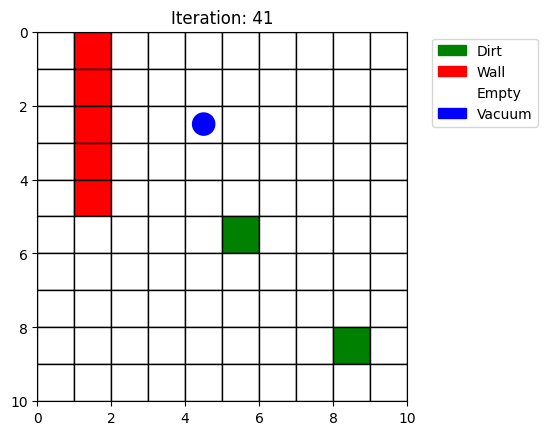

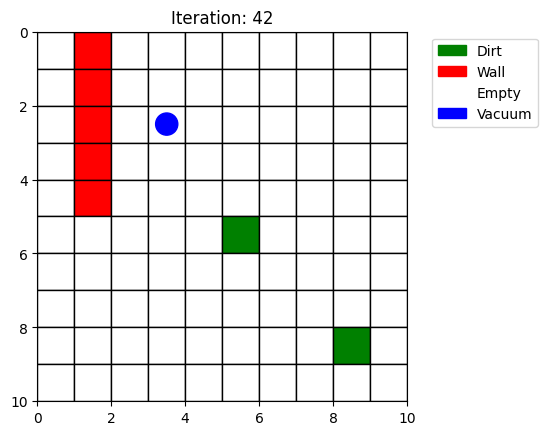

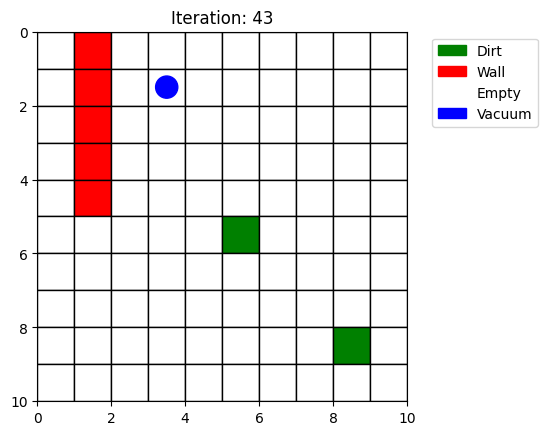

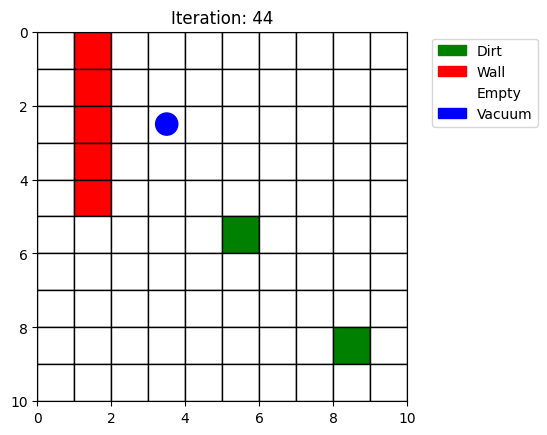

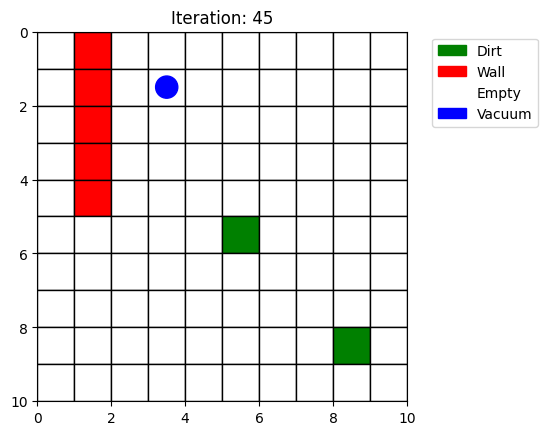

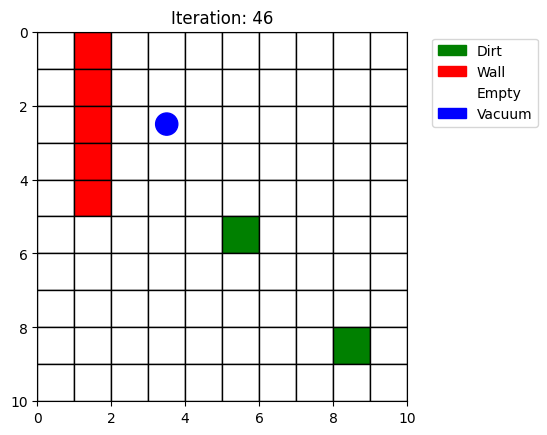

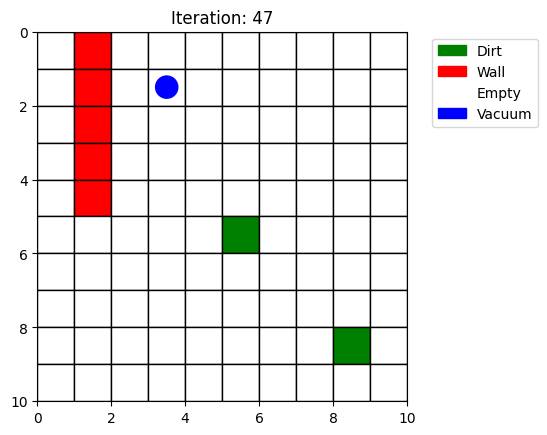

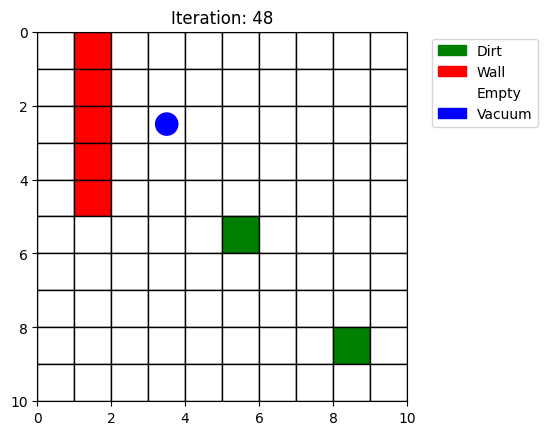

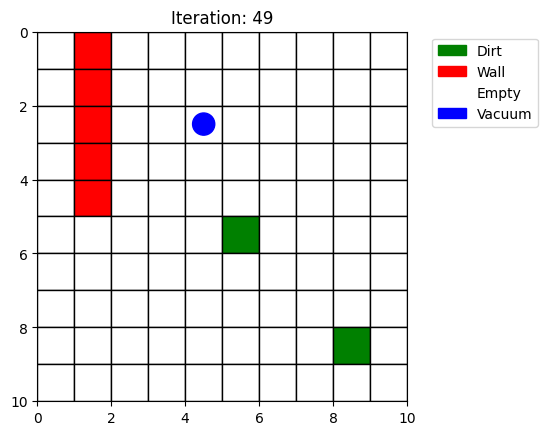

<ipython-input-7-4d648d81d9b9>:67: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Total de sujeiras limpas: 1
Tempo total de simulação: 32.85 segundos
Média de sujeiras limpas por iteração: 0.02


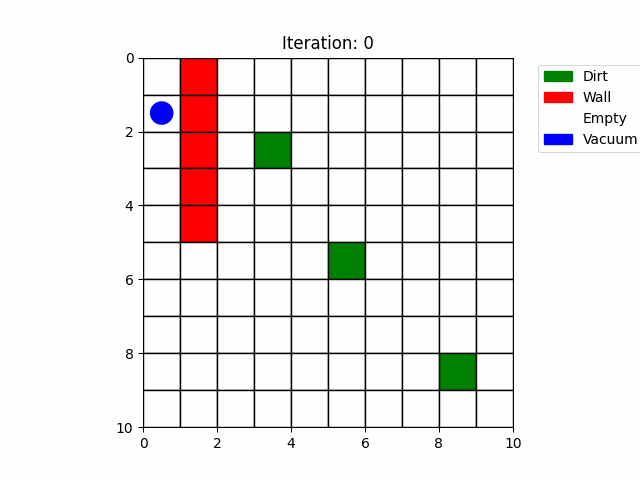

In [ ]:
import imageio
import time
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Função para desenhar a grid e o estado atual do robô
def draw_grid(house, state, iteration):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == -1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    # Desenhando o robô
    robot = patches.Circle((state[1] + 0.5, state[0] + 0.5), 0.3, linewidth=1, edgecolor='blue', facecolor='blue')
    ax.add_patch(robot)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title(f'Iteration: {iteration}')
    legend_handles = [
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty'),
        patches.Patch(color='blue', label='Vacuum')
    ]
    ax.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'iteration_{iteration}.png')
    plt.show()
    plt.close()

# Simulação e criação do GIF
filenames = []
reset_house()
state = (0, 0)

dirt_cleaned = 0
total_iterations = 50
start_time = time.time()

for iteration in range(total_iterations):  # Simular por 50 iterações
    action = choose_action(state)
    next_state = get_next_state(state, action)
    if is_valid_state(next_state):
        state = next_state
    # Se o robô encontrar sujeira, limpa a sujeira
    if house[state[0], state[1]] == 1:
        house[state[0], state[1]] = 0  # Marca como limpo
        dirt_cleaned += 1
    draw_grid(house, state, iteration)
    filenames.append(f'iteration_{iteration}.png')
    time.sleep(0.1)

end_time = time.time()
total_time = end_time - start_time

# Criando o GIF
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('simulation.gif', images, duration=0.5)

# Remover arquivos PNG temporários
for filename in filenames:
    os.remove(filename)

# Exibir métricas da simulação
print(f'Total de sujeiras limpas: {dirt_cleaned}')
print(f'Tempo total de simulação: {total_time:.2f} segundos')
print(f'Média de sujeiras limpas por iteração: {dirt_cleaned / total_iterations:.2f}')

# Exibir o GIF criado
from IPython.display import Image, display
display(Image(filename='simulation.gif'))




INTERFACEEEEEEEE

In [2]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s 

In [41]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Configuração inicial
grid_size = (10, 10)
house = np.zeros(grid_size, dtype=int)

def draw_grid(house):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            elif house[x, y] == 2:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == 3:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='blue')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title('Environment Configuration')
    plt.legend(handles=[
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='blue', label='Vacuum'),
        patches.Patch(color='white', label='Empty')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig("grid.png")
    plt.close()
    return "grid.png"

def update_grid(grid):
    global house
    house = np.array(grid, dtype=int)
    return draw_grid(house)

with gr.Blocks() as gui:
    gr.Markdown("# Environment Configuration")
    with gr.Row():
        with gr.Column():
            env_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="Edit the grid: 0 = Empty, 1 = Wall, 2 = Dirt, 3 = Vacuum")
            generate_button = gr.Button("Generate Environment")
        with gr.Column():
            env_img = gr.Image(interactive=False)

    generate_button.click(fn=update_grid, inputs=env_grid, outputs=env_img)

gui.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f0cf79ae06f91f221e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


TREINAMENTOOOOOO

In [44]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import time

# Configuração inicial
grid_size = (10, 10)
house = np.zeros(grid_size, dtype=int)
vacuum_pos = None
q_table = np.zeros((grid_size[0], grid_size[1], 4))

def draw_grid(house, vacuum_pos):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == 2:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            elif house[x, y] == 3:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='blue')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    if vacuum_pos:
        robot = patches.Circle((vacuum_pos[1] + 0.5, vacuum_pos[0] + 0.5), 0.3, linewidth=1, edgecolor='blue', facecolor='blue')
        ax.add_patch(robot)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title('Environment Configuration')
    plt.legend(handles=[
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty'),
        patches.Patch(color='blue', label='Vacuum')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig("grid.png")
    plt.close()
    return "grid.png"

def update_grid(grid):
    global house, vacuum_pos
    house = np.array(grid, dtype=int)
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    return draw_grid(house, vacuum_pos)

def reset_house():
    global house
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if house[i, j] == 3:
                house[i, j] = 0  # Limpar posição do robô
    for dirt in np.argwhere(house == 1):
        house[dirt[0], dirt[1]] = 1  # Adicionar sujeira
    for wall in np.argwhere(house == 2):
        house[wall[0], wall[1]] = -1  # Adicionar paredes

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

def train_robot(episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty):
    global house, vacuum_pos, q_table, max_steps_per_episode
    rewards_per_episode = []
    max_steps_per_episode = 100  # Limite de passos por episódio

    for episode in range(episodes):
        reset_house()  # Reinicia o estado da casa a cada episódio
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
        while not is_valid_state(state) or house[state] == 1:  # Certificando-se de que não começamos em uma parede ou sujeira
            state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

        steps = 0
        total_reward = 0
        while steps < max_steps_per_episode:
            action = choose_action(state, epsilon)
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                reward = house[next_state]
                q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                    alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
                total_reward += reward + move_penalty
                if reward == 1:
                    house[next_state] = 0  # Limpar a sujeira
                    break
            steps += 1

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    plt.plot(rewards_per_episode)
    plt.xlabel('Episódio')
    plt.ylabel('Recompensa Total')
    plt.title('Recompensa Total por Episódio durante o Treinamento')
    plt.savefig("training_rewards.png")
    plt.close()

    return "training_rewards.png"

with gr.Blocks() as gui:
    gr.Markdown("# Environment Configuration")
    with gr.Row():
        with gr.Column():
            env_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="Edit the grid: 0 = Empty, 1 = Wall, 2 = Dirt, 3 = Vacuum")
            generate_button = gr.Button("Generate Environment")
        with gr.Column():
            env_img = gr.Image(interactive=False)

    generate_button.click(fn=update_grid, inputs=env_grid, outputs=env_img)

    gr.Markdown("# Robot Training")
    with gr.Row():
        episodes = gr.Number(label="Episodes", value=1000)
        alpha = gr.Number(label="Alpha (Learning Rate)", value=0.2)
        gamma = gr.Number(label="Gamma (Discount Factor)", value=0.95)
        epsilon = gr.Number(label="Epsilon (Exploration Rate)", value=1.0)
        epsilon_decay = gr.Number(label="Epsilon Decay", value=0.995)
        epsilon_min = gr.Number(label="Epsilon Min", value=0.1)
        move_penalty = gr.Number(label="Move Penalty", value=-0.1)
        train_button = gr.Button("Train Robot")
    with gr.Row():
        training_img = gr.Image(interactive=False)

    train_button.click(fn=train_robot, inputs=[episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty], outputs=training_img)

gui.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://ffb0e60115a7b672a0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://ffb0e60115a7b672a0.gradio.live


In [45]:
import time
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gradio as gr

# Inicializando a Q-Table
grid_size = (10, 10)
q_table = np.zeros((grid_size[0], grid_size[1], 4))  # 4 ações: cima, baixo, esquerda, direita

# Hiperparâmetros
alpha = 0.2  # Taxa de aprendizado
gamma = 0.95  # Fator de desconto
epsilon = 1.0  # Taxa de exploração inicial
epsilon_decay = 0.995  # Taxa de decaimento da exploração ajustada
epsilon_min = 0.1  # Taxa mínima de exploração
max_steps_per_episode = 100  # Limite de passos por episódio
move_penalty = -0.1  # Penalidade por cada movimento
rewards_per_episode = []
episode_log = []

def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

def reset_house():
    house.fill(0)
    for dirt in dirt_positions:
        house[dirt] = 1
    for wall in walls:
        house[wall] = -1

def train_robot(epsilon_decay, alpha, move_penalty, episodes):
    global epsilon
    epsilon = 1.0  # Redefinindo a taxa de exploração inicial para cada treinamento
    rewards_per_episode.clear()
    episode_log.clear()

    for episode in range(episodes):
        reset_house()
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
        while not is_valid_state(state) or house[state] == 1:
            state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

        steps = 0
        total_reward = 0
        episode_info = []

        while steps < max_steps_per_episode:
            action = choose_action(state)
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                reward = house[next_state]
                q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                    alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
                total_reward += reward + move_penalty
                if reward == 1:
                    house[next_state] = 0
                    episode_info.append(f"Episódio {episode}, Passo {steps}: Robô encontrou sujeira na posição {state}!")
                    break
            steps += 1

        rewards_per_episode.append(total_reward)
        episode_log.append(f"Episódio {episode} concluído com recompensa total: {total_reward}")
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        episode_log.extend(episode_info)

    fig, ax = plt.subplots()
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episódio')
    ax.set_ylabel('Recompensa Total')
    ax.set_title('Recompensa Total por Episódio durante o Treinamento')
    plt.savefig("training_rewards.png")
    plt.close()

    return "training_rewards.png", "\n".join(episode_log)

with gr.Blocks() as gui:
    gr.Markdown("# Treinamento do Robô Aspirador")

    with gr.Row():
        with gr.Column():
            epsilon_decay_slider = gr.Slider(0.9, 0.999, value=0.995, label="Taxa de Decaimento do Epsilon")
            alpha_slider = gr.Slider(0.1, 0.5, value=0.2, label="Taxa de Aprendizado (Alpha)")
            move_penalty_slider = gr.Slider(-1.0, 0.0, value=-0.1, label="Penalidade por Movimento")
            episodes_slider = gr.Slider(100, 2000, value=1000, step=100, label="Número de Episódios")
            train_button = gr.Button("Train Robot")

        with gr.Column():
            rewards_plot = gr.Image(label="Gráfico de Recompensas")
            episode_log_output = gr.Textbox(label="Log de Episódios", lines=20, interactive=False)

    train_button.click(
        train_robot,
        inputs=[epsilon_decay_slider, alpha_slider, move_penalty_slider, episodes_slider],
        outputs=[rewards_plot, episode_log_output]
    )

gui.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://54dbcdee4e8b4c95c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 541, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1928, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1514, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    r

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://54dbcdee4e8b4c95c4.gradio.live


In [47]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import time

# Configuração inicial
grid_size = (10, 10)
house = np.zeros(grid_size, dtype=int)
vacuum_pos = None
q_table = np.zeros((grid_size[0], grid_size[1], 4))

def draw_grid(house, vacuum_pos):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == 2:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            elif house[x, y] == 3:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='blue')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    if vacuum_pos:
        robot = patches.Circle((vacuum_pos[1] + 0.5, vacuum_pos[0] + 0.5), 0.3, linewidth=1, edgecolor='blue', facecolor='blue')
        ax.add_patch(robot)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title('Environment Configuration')
    plt.legend(handles=[
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty'),
        patches.Patch(color='blue', label='Vacuum')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig("grid.png")
    plt.close()
    return "grid.png"

def update_grid(grid):
    global house, vacuum_pos
    house = np.array(grid, dtype=int)
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    return draw_grid(house, vacuum_pos)

def reset_house():
    global house
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if house[i, j] == 3:
                house[i, j] = 0  # Limpar posição do robô
    for dirt in np.argwhere(house == 1):
        house[dirt[0], dirt[1]] = 1  # Adicionar sujeira
    for wall in np.argwhere(house == 2):
        house[wall[0], wall[1]] = -1  # Adicionar paredes

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

def train_robot(episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty):
    global house, vacuum_pos, q_table, max_steps_per_episode
    rewards_per_episode = []
    max_steps_per_episode = 100  # Limite de passos por episódio
    episode_log = []

    for episode in range(episodes):
        reset_house()  # Reinicia o estado da casa a cada episódio
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
        while not is_valid_state(state) or house[state] == 1:  # Certificando-se de que não começamos em uma parede ou sujeira
            state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

        steps = 0
        total_reward = 0
        episode_info = []

        while steps < max_steps_per_episode:
            action = choose_action(state, epsilon)
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                reward = house[next_state]
                q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                    alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
                total_reward += reward + move_penalty
                if reward == 1:
                    house[next_state] = 0  # Limpar a sujeira
                    episode_info.append(f"Episódio {episode}, Passo {steps}: Robô encontrou sujeira na posição {state}!")
                    break
            steps += 1

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        episode_log.append(f"Episódio {episode} concluído com recompensa total: {total_reward}")
        episode_log.extend(episode_info)

    fig, ax = plt.subplots()
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episódio')
    ax.set_ylabel('Recompensa Total')
    ax.set_title('Recompensa Total por Episódio durante o Treinamento')
    plt.savefig("training_rewards.png")
    plt.close()

    return "training_rewards.png", "\n".join(episode_log)

with gr.Blocks() as gui:
    gr.Markdown("# Environment Configuration")
    with gr.Row():
        with gr.Column():
            env_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="Edit the grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
            generate_button = gr.Button("Generate Environment")
        with gr.Column():
            env_img = gr.Image(interactive=False)

    generate_button.click(fn=update_grid, inputs=env_grid, outputs=env_img)

    gr.Markdown("# Robot Training")
    with gr.Row():
        episodes = gr.Number(label="Episodes", value=1000)
        alpha = gr.Number(label="Alpha (Learning Rate)", value=0.2)
        gamma = gr.Number(label="Gamma (Discount Factor)", value=0.95)
        epsilon = gr.Number(label="Epsilon (Exploration Rate)", value=1.0)
        epsilon_decay = gr.Number(label="Epsilon Decay", value=0.995)
        epsilon_min = gr.Number(label="Epsilon Min", value=0.1)
        move_penalty = gr.Number(label="Move Penalty", value=-0.1)
        train_button = gr.Button("Train Robot")
    with gr.Row():
        training_img = gr.Image(interactive=False)
        episode_log_output = gr.Textbox(label="Log de Episódios", lines=20, interactive=False)

    train_button.click(fn=train_robot, inputs=[episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty], outputs=[training_img, episode_log_output])

gui.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4246eeac3c52a462c6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://4246eeac3c52a462c6.gradio.live


SIMULACAO E SALVAMENTO

In [49]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import time
import imageio
import os

# Configuração inicial
grid_size = (10, 10)
house = np.zeros(grid_size, dtype=int)
vacuum_pos = None
q_table = np.zeros((grid_size[0], grid_size[1], 4))

def draw_grid(house, vacuum_pos, iteration=None):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == 2:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            elif house[x, y] == 3:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='blue')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    if vacuum_pos:
        robot = patches.Circle((vacuum_pos[1] + 0.5, vacuum_pos[0] + 0.5), 0.3, linewidth=1, edgecolor='blue', facecolor='blue')
        ax.add_patch(robot)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title(f'Environment Configuration' if iteration is None else f'Iteration: {iteration}')
    plt.legend(handles=[
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty'),
        patches.Patch(color='blue', label='Vacuum')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    if iteration is not None:
        plt.savefig(f"iteration_{iteration}.png")
    else:
        plt.savefig("grid.png")
    plt.close()
    return f"iteration_{iteration}.png" if iteration is not None else "grid.png"

def update_grid(grid):
    global house, vacuum_pos
    house = np.array(grid, dtype=int)
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    return draw_grid(house, vacuum_pos)

def reset_house():
    global house
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if house[i, j] == 3:
                house[i, j] = 0  # Limpar posição do robô
    for dirt in np.argwhere(house == 1):
        house[dirt[0], dirt[1]] = 1  # Adicionar sujeira
    for wall in np.argwhere(house == 2):
        house[wall[0], wall[1]] = -1  # Adicionar paredes

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

def train_robot(episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty):
    global house, vacuum_pos, q_table, max_steps_per_episode
    rewards_per_episode = []
    max_steps_per_episode = 100  # Limite de passos por episódio
    episode_log = []

    for episode in range(episodes):
        reset_house()  # Reinicia o estado da casa a cada episódio
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
        while not is_valid_state(state) or house[state] == 1:  # Certificando-se de que não começamos em uma parede ou sujeira
            state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

        steps = 0
        total_reward = 0
        episode_info = []

        while steps < max_steps_per_episode:
            action = choose_action(state, epsilon)
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                reward = house[next_state]
                q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                    alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
                total_reward += reward + move_penalty
                if reward == 1:
                    house[next_state] = 0  # Limpar a sujeira
                    episode_info.append(f"Episódio {episode}, Passo {steps}: Robô encontrou sujeira na posição {state}!")
                    break
            steps += 1

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        episode_log.append(f"Episódio {episode} concluído com recompensa total: {total_reward}")
        episode_log.extend(episode_info)

    fig, ax = plt.subplots()
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episódio')
    ax.set_ylabel('Recompensa Total')
    ax.set_title('Recompensa Total por Episódio durante o Treinamento')
    plt.savefig("training_rewards.png")
    plt.close()

    return "training_rewards.png", "\n".join(episode_log)

def simulate_robot(iterations):
    global house, vacuum_pos
    filenames = []
    reset_house()
    state = vacuum_pos

    dirt_cleaned = 0
    start_time = time.time()

    for iteration in range(iterations):
        action = choose_action(state, epsilon=0)  # Usar a política treinada (epsilon=0)
        next_state = get_next_state(state, action)
        if is_valid_state(next_state):
            state = next_state
        # Se o robô encontrar sujeira, limpa a sujeira
        if house[state[0], state[1]] == 1:
            house[state[0], state[1]] = 0  # Marca como limpo
            dirt_cleaned += 1
        filenames.append(draw_grid(house, state, iteration))
        time.sleep(0.1)

    end_time = time.time()
    total_time = end_time - start_time

    # Criando o GIF
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('simulation.gif', images, duration=0.5)

    # Remover arquivos PNG temporários
    for filename in filenames:
        os.remove(filename)

    metrics = f'Total de sujeiras limpas: {dirt_cleaned}\n'
    metrics += f'Tempo total de simulação: {total_time:.2f} segundos\n'
    metrics += f'Média de sujeiras limpas por iteração: {dirt_cleaned / iterations:.2f}'

    return 'simulation.gif', metrics

with gr.Blocks() as gui:
    gr.Markdown("# Environment Configuration")
    with gr.Row():
        with gr.Column():
            env_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="Edit the grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
            generate_button = gr.Button("Generate Environment")
        with gr.Column():
            env_img = gr.Image(interactive=False)

    generate_button.click(fn=update_grid, inputs=env_grid, outputs=env_img)

    gr.Markdown("# Robot Training")
    with gr.Row():
        episodes = gr.Number(label="Episodes", value=1000)
        alpha = gr.Number(label="Alpha (Learning Rate)", value=0.2)
        gamma = gr.Number(label="Gamma (Discount Factor)", value=0.95)
        epsilon = gr.Number(label="Epsilon (Exploration Rate)", value=1.0)
        epsilon_decay = gr.Number(label="Epsilon Decay", value=0.995)
        epsilon_min = gr.Number(label="Epsilon Min", value=0.1)
        move_penalty = gr.Number(label="Move Penalty", value=-0.1)
        train_button = gr.Button("Train Robot")
    with gr.Row():
        training_img = gr.Image(interactive=False)
        episode_log_output = gr.Textbox(label="Log de Episódios", lines=20, interactive=False)

    train_button.click(fn=train_robot, inputs=[episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty], outputs=[training_img, episode_log_output])

    gr.Markdown("# Robot Simulation")
    with gr.Row():
        iterations = gr.Number(label="Iterations", value=50)
        simulate_button = gr.Button("Simulate Robot")
    with gr.Row():
        simulation_img = gr.Image(interactive=False)
        metrics_output = gr.Textbox(label="Simulation Metrics", lines=10, interactive=False)

    simulate_button.click(fn=simulate_robot, inputs=iterations, outputs=[simulation_img, metrics_output])

gui.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7fdc356fc20d84bebd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://7fdc356fc20d84bebd.gradio.live


In [53]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import time
import imageio
import os

# Configuração inicial
grid_size = (10, 10)
house = np.zeros(grid_size, dtype=int)
vacuum_pos = None
q_table = np.zeros((grid_size[0], grid_size[1], 4))

def draw_grid(house, vacuum_pos, iteration=None):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == 2:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            elif house[x, y] == 3:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='blue')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    if vacuum_pos:
        robot = patches.Circle((vacuum_pos[1] + 0.5, vacuum_pos[0] + 0.5), 0.3, linewidth=1, edgecolor='blue', facecolor='blue')
        ax.add_patch(robot)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title(f'Environment Configuration' if iteration is None else f'Iteration: {iteration}')
    plt.legend(handles=[
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty'),
        patches.Patch(color='blue', label='Vacuum')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    if iteration is not None:
        plt.savefig(f"iteration_{iteration}.png")
    else:
        plt.savefig("grid.png")
    plt.close()
    return f"iteration_{iteration}.png" if iteration is not None else "grid.png"

def update_grid(grid):
    global house, vacuum_pos
    house = np.array(grid, dtype=int)
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    return draw_grid(house, vacuum_pos)

def reset_house():
    global house
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if house[i, j] == 3:
                house[i, j] = 0  # Limpar posição do robô
    for dirt in np.argwhere(house == 1):
        house[dirt[0], dirt[1]] = 1  # Adicionar sujeira
    for wall in np.argwhere(house == 2):
        house[wall[0], wall[1]] = -1  # Adicionar paredes

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

def train_robot(episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty):
    global house, vacuum_pos, q_table, max_steps_per_episode
    rewards_per_episode = []
    max_steps_per_episode = 100  # Limite de passos por episódio
    episode_log = []

    for episode in range(episodes):
        reset_house()  # Reinicia o estado da casa a cada episódio
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
        while not is_valid_state(state) or house[state] == 1:  # Certificando-se de que não começamos em uma parede ou sujeira
            state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

        steps = 0
        total_reward = 0
        episode_info = []

        while steps < max_steps_per_episode:
            action = choose_action(state, epsilon)
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                reward = house[next_state]
                q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                    alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
                total_reward += reward + move_penalty
                if reward == 1:
                    house[next_state] = 0  # Limpar a sujeira
                    episode_info.append(f"Episódio {episode}, Passo {steps}: Robô encontrou sujeira na posição {state}!")
                    break
            steps += 1

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        episode_log.append(f"Episódio {episode} concluído com recompensa total: {total_reward}")
        episode_log.extend(episode_info)

    fig, ax = plt.subplots()
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episódio')
    ax.set_ylabel('Recompensa Total')
    ax.set_title('Recompensa Total por Episódio durante o Treinamento')
    plt.savefig("training_rewards.png")
    plt.close()

    return "training_rewards.png", "\n".join(episode_log)

def simulate_robot(iterations):
    global house, vacuum_pos
    filenames = []
    reset_house()
    state = vacuum_pos

    dirt_cleaned = 0
    start_time = time.time()

    for iteration in range(iterations):
        action = choose_action(state, epsilon=0)  # Usar a política treinada (epsilon=0)
        next_state = get_next_state(state, action)
        if is_valid_state(next_state):
            state = next_state
        # Se o robô encontrar sujeira, limpa a sujeira
        if house[state[0], state[1]] == 1:
            house[state[0], state[1]] = 0  # Marca como limpo
            dirt_cleaned += 1
        filenames.append(draw_grid(house, state, iteration))
        time.sleep(0.1)

    end_time = time.time()
    total_time = end_time - start_time

    # Criando o GIF
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('simulation.gif', images, duration=0.5)

    # Remover arquivos PNG temporários
    for filename in filenames:
        os.remove(filename)

    metrics = f'Total de sujeiras limpas: {dirt_cleaned}\n'
    metrics += f'Tempo total de simulação: {total_time:.2f} segundos\n'
    metrics += f'Média de sujeiras limpas por iteração: {dirt_cleaned / iterations:.2f}'

    return 'simulation.gif', metrics

with gr.Blocks() as gui:
    gr.Markdown("# Environment Configuration")
    with gr.Row():
        with gr.Column():
            env_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="Edit the grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
            generate_button = gr.Button("Generate Environment")
        with gr.Column():
            env_img = gr.Image(interactive=False)

    generate_button.click(fn=update_grid, inputs=env_grid, outputs=env_img)

    gr.Markdown("# Robot Training")
    with gr.Row():
        episodes = gr.Number(label="Episodes", value=2000)
        alpha = gr.Number(label="Alpha (Learning Rate)", value=0.2)
        gamma = gr.Number(label="Gamma (Discount Factor)", value=0.95)
        epsilon = gr.Number(label="Epsilon (Exploration Rate)", value=1.0)
        epsilon_decay = gr.Number(label="Epsilon Decay", value=0.995)
        epsilon_min = gr.Number(label="Epsilon Min", value=0.1)
        move_penalty = gr.Number(label="Move Penalty", value=-0.5)
        train_button = gr.Button("Train Robot")
    with gr.Row():
        training_img = gr.Image(interactive=False)
        episode_log_output = gr.Textbox(label="Log de Episódios", lines=20, interactive=False)

    train_button.click(fn=train_robot, inputs=[episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty], outputs=[training_img, episode_log_output])

    gr.Markdown("# Robot Simulation")
    with gr.Row():
        iterations = gr.Number(label="Iterations", value=50)
        simulate_button = gr.Button("Simulate Robot")
    with gr.Row():
        simulation_img = gr.Image(interactive=False)
        metrics_output = gr.Textbox(label="Simulation Metrics", lines=10, interactive=False)

    simulate_button.click(fn=simulate_robot, inputs=iterations, outputs=[simulation_img, metrics_output])

gui.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3cd473e623be98d798.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


<ipython-input-53-99ed963ecac4>:162: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://3cd473e623be98d798.gradio.live


FUNCIONANDO PERFEITO!!! QUASE!

In [60]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import time
import imageio
import os

# Configuração inicial
grid_size = (10, 10)
house = np.zeros(grid_size, dtype=int)
vacuum_pos = None
q_table = np.zeros((grid_size[0], grid_size[1], 4))
initial_house = None

def draw_grid(house, vacuum_pos, iteration=None):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == 2:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            elif house[x, y] == 3:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='blue')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    if vacuum_pos:
        robot = patches.Circle((vacuum_pos[1] + 0.5, vacuum_pos[0] + 0.5), 0.3, linewidth=1, edgecolor='blue', facecolor='blue')
        ax.add_patch(robot)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title(f'Environment Configuration' if iteration is None else f'Iteration: {iteration}')
    plt.legend(handles=[
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty'),
        patches.Patch(color='blue', label='Vacuum')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    if iteration is not None:
        plt.savefig(f"iteration_{iteration}.png")
    else:
        plt.savefig("grid.png")
    plt.close()
    return f"iteration_{iteration}.png" if iteration is not None else "grid.png"

def update_grid(grid):
    global house, vacuum_pos, initial_house
    house = np.array(grid, dtype=int)
    initial_house = house.copy()  # Guardar o estado inicial do ambiente
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    return draw_grid(house, vacuum_pos)

def reset_house():
    global house
    house = initial_house.copy()  # Restaurar o estado inicial do ambiente

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

def train_robot(episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty):
    global house, vacuum_pos, q_table, max_steps_per_episode
    rewards_per_episode = []
    max_steps_per_episode = 200  # Limite de passos por episódio
    episode_log = []

    for episode in range(episodes):
        reset_house()  # Restaurar o estado inicial do ambiente a cada episódio
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
        while not is_valid_state(state) or house[state] == 1:  # Certificando-se de que não começamos em uma parede ou sujeira
            state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

        steps = 0
        total_reward = 0
        episode_info = []

        while steps < max_steps_per_episode:
            action = choose_action(state, epsilon)
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                reward = 1 if house[next_state] == 1 else move_penalty  # Recompensa por encontrar sujeira
                q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                    alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
                total_reward += reward
                if reward == 1:
                    house[next_state] = 0  # Limpar a sujeira
                    episode_info.append(f"Episódio {episode}, Passo {steps}: Robô encontrou sujeira na posição {state}!")
            steps += 1

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        episode_log.append(f"Episódio {episode} concluído com recompensa total: {total_reward}")
        episode_log.extend(episode_info)

    fig, ax = plt.subplots()
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episódio')
    ax.set_ylabel('Recompensa Total')
    ax.set_title('Recompensa Total por Episódio durante o Treinamento')
    plt.savefig("training_rewards.png")
    plt.close()

    return "training_rewards.png", "\n".join(episode_log)

def simulate_robot(simulation_grid, iterations):
    global house, vacuum_pos
    house = np.array(simulation_grid, dtype=int)
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    filenames = []

    state = vacuum_pos

    dirt_cleaned = 0
    start_time = time.time()

    for iteration in range(iterations):
        action = choose_action(state, epsilon=0)  # Usar a política treinada (epsilon=0)
        next_state = get_next_state(state, action)
        if is_valid_state(next_state):
            state = next_state
        # Se o robô encontrar sujeira, limpa a sujeira
        if house[state[0], state[1]] == 1:
            house[state[0], state[1]] = 0  # Marca como limpo
            dirt_cleaned += 1
        draw_grid(house, state, iteration)
        filenames.append(f'iteration_{iteration}.png')
        time.sleep(0.1)

    end_time = time.time()
    total_time = end_time - start_time

    # Criando o GIF
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('simulation.gif', images, duration=0.5)

    # Remover arquivos PNG temporários
    for filename in filenames:
        os.remove(filename)

    metrics = f'Total de sujeiras limpas: {dirt_cleaned}\n'
    metrics += f'Tempo total de simulação: {total_time:.2f} segundos\n'
    metrics += f'Média de sujeiras limpas por iteração: {dirt_cleaned / iterations:.2f}'

    return 'simulation.gif', metrics

with gr.Blocks() as gui:
    gr.Markdown("# Environment Configuration")
    with gr.Row():
        with gr.Column():
            env_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="Edit the grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
            generate_button = gr.Button("Generate Environment")
        with gr.Column():
            env_img = gr.Image(interactive=False)

    generate_button.click(fn=update_grid, inputs=env_grid, outputs=env_img)

    gr.Markdown("# Robot Training")
    with gr.Row():
        episodes = gr.Number(label="Episodes", value=2000)
        alpha = gr.Number(label="Alpha (Learning Rate)", value=0.2)
        gamma = gr.Number(label="Gamma (Discount Factor)", value=0.95)
        epsilon = gr.Number(label="Epsilon (Exploration Rate)", value=1.0)
        epsilon_decay = gr.Number(label="Epsilon Decay", value=0.999)
        epsilon_min = gr.Number(label="Epsilon Min", value=0.1)
        move_penalty = gr.Number(label="Move Penalty", value=-0.1)
        train_button = gr.Button("Train Robot")
    with gr.Row():
        training_img = gr.Image(interactive=False)
        episode_log_output = gr.Textbox(label="Log de Episódios", lines=20, interactive=False)

    train_button.click(fn=train_robot, inputs=[episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty], outputs=[training_img, episode_log_output])

    gr.Markdown("# Robot Simulation")
    with gr.Row():
        new_simulation_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="New Simulation Grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
        iterations = gr.Number(label="Iterations", value=50)
        simulate_button = gr.Button("Simulate Robot")
    with gr.Row():
        simulation_img = gr.Image(interactive=False)
        metrics_output = gr.Textbox(label="Simulation Metrics", lines=10, interactive=False)

    simulate_button.click(fn=simulate_robot, inputs=[new_simulation_grid, iterations], outputs=[simulation_img, metrics_output])

gui.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://8f0f77c832a8b14319.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


<ipython-input-60-d9091bb971aa>:159: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://8f0f77c832a8b14319.gradio.live


Para Hugging Face

In [62]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import time
import imageio
import os

# Configuração inicial
grid_size = (10, 10)
house = np.zeros(grid_size, dtype=int)
vacuum_pos = None
q_table = np.zeros((grid_size[0], grid_size[1], 4))
initial_house = None

def draw_grid(house, vacuum_pos, iteration=None):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == 2:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            elif house[x, y] == 3:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='blue')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    if vacuum_pos:
        robot = patches.Circle((vacuum_pos[1] + 0.5, vacuum_pos[0] + 0.5), 0.3, linewidth=1, edgecolor='blue', facecolor='blue')
        ax.add_patch(robot)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title(f'Environment Configuration' if iteration is None else f'Iteration: {iteration}')
    plt.legend(handles=[
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty'),
        patches.Patch(color='blue', label='Vacuum')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    if iteration is not None:
        plt.savefig(f"iteration_{iteration}.png")
    else:
        plt.savefig("grid.png")
    plt.close()
    return f"iteration_{iteration}.png" if iteration is not None else "grid.png"

def update_grid(grid):
    global house, vacuum_pos, initial_house
    house = np.array(grid, dtype=int)
    initial_house = house.copy()  # Guardar o estado inicial do ambiente
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    return draw_grid(house, vacuum_pos)

def reset_house():
    global house
    house = initial_house.copy()  # Restaurar o estado inicial do ambiente

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

def train_robot(episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty):
    global house, vacuum_pos, q_table, max_steps_per_episode
    rewards_per_episode = []
    max_steps_per_episode = 200  # Limite de passos por episódio
    episode_log = []

    for episode in range(episodes):
        reset_house()  # Restaurar o estado inicial do ambiente a cada episódio
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
        while not is_valid_state(state) or house[state] == 1:  # Certificando-se de que não começamos em uma parede ou sujeira
            state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

        steps = 0
        total_reward = 0
        episode_info = []

        while steps < max_steps_per_episode:
            action = choose_action(state, epsilon)
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                reward = 1 if house[next_state] == 1 else move_penalty  # Recompensa por encontrar sujeira
                q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                    alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
                total_reward += reward
                if reward == 1:
                    house[next_state] = 0  # Limpar a sujeira
                    episode_info.append(f"Episódio {episode}, Passo {steps}: Robô encontrou sujeira na posição {state}!")
            steps += 1

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        episode_log.append(f"Episódio {episode} concluído com recompensa total: {total_reward}")
        episode_log.extend(episode_info)

    fig, ax = plt.subplots()
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episódio')
    ax.set_ylabel('Recompensa Total')
    ax.set_title('Recompensa Total por Episódio durante o Treinamento')
    plt.savefig("training_rewards.png")
    plt.close()

    return "training_rewards.png", "\n".join(episode_log)

def simulate_robot(simulation_grid, iterations):
    global house, vacuum_pos
    house = np.array(simulation_grid, dtype=int)
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    filenames = []

    state = vacuum_pos

    dirt_cleaned = 0
    start_time = time.time()

    for iteration in range(iterations):
        action = choose_action(state, epsilon=0)  # Usar a política treinada (epsilon=0)
        next_state = get_next_state(state, action)
        if is_valid_state(next_state):
            state = next_state
        # Se o robô encontrar sujeira, limpa a sujeira
        if house[state[0], state[1]] == 1:
            house[state[0], state[1]] = 0  # Marca como limpo
            dirt_cleaned += 1
        draw_grid(house, state, iteration)
        filenames.append(f'iteration_{iteration}.png')
        time.sleep(0.1)

    end_time = time.time()
    total_time = end_time - start_time

    # Criando o GIF
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('simulation.gif', images, duration=0.5)

    # Remover arquivos PNG temporários
    for filename in filenames:
        os.remove(filename)

    metrics = f'Total de sujeiras limpas: {dirt_cleaned}\n'
    metrics += f'Tempo total de simulação: {total_time:.2f} segundos\n'
    metrics += f'Média de sujeiras limpas por iteração: {dirt_cleaned / iterations:.2f}'

    return 'simulation.gif', metrics

with gr.Blocks() as gui:
    gr.Markdown("# Vacuum Cleaner Robot Simulation")

    with gr.Accordion("🏠⚙️ Environment Configuration", open=False):
        with gr.Row():
            with gr.Column():
                env_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="Edit the grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
                generate_button = gr.Button("Generate Environment")
            with gr.Column():
                env_img = gr.Image(interactive=False)
        generate_button.click(fn=update_grid, inputs=env_grid, outputs=env_img)

    with gr.Accordion("🤖🔧 Vacuum Robot Training", open=False):
        with gr.Row():
            episodes = gr.Number(label="Episodes", value=2000)
            alpha = gr.Number(label="Alpha (Learning Rate)", value=0.2)
            gamma = gr.Number(label="Gamma (Discount Factor)", value=0.95)
            epsilon = gr.Number(label="Epsilon (Exploration Rate)", value=1.0)
            epsilon_decay = gr.Number(label="Epsilon Decay", value=0.999)
            epsilon_min = gr.Number(label="Epsilon Min", value=0.1)
            move_penalty = gr.Number(label="Move Penalty", value=-0.1)
            train_button = gr.Button("Train Robot")
        with gr.Row():
            training_img = gr.Image(interactive=False)
            episode_log_output = gr.Textbox(label="Log de Episódios", lines=20, interactive=False)
        train_button.click(fn=train_robot, inputs=[episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty], outputs=[training_img, episode_log_output])

    with gr.Accordion("🤖📊 Robot Simulation", open=False):
        with gr.Row():
            new_simulation_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="New Simulation Grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
            iterations = gr.Number(label="Iterations", value=50)
            simulate_button = gr.Button("Simulate Robot")
        with gr.Row():
            simulation_img = gr.Image(interactive=False)
            metrics_output = gr.Textbox(label="Simulation Metrics", lines=10, interactive=False)
        simulate_button.click(fn=simulate_robot, inputs=[new_simulation_grid, iterations], outputs=[simulation_img, metrics_output])

gui.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://004cf6a6fcf989a0f1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://004cf6a6fcf989a0f1.gradio.live


In [64]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import time
import imageio
import os

# Configuração inicial
grid_size = (10, 10)
house = np.zeros(grid_size, dtype=int)
vacuum_pos = None
q_table = np.zeros((grid_size[0], grid_size[1], 4))
initial_house = None

def draw_grid(house, vacuum_pos, iteration=None):
    fig, ax = plt.subplots()
    block_size = 1
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if house[x, y] == 1:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='green')
            elif house[x, y] == 2:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='red')
            elif house[x, y] == 3:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='blue')
            else:
                rect = patches.Rectangle((y, x), block_size, block_size, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    if vacuum_pos:
        robot = patches.Circle((vacuum_pos[1] + 0.5, vacuum_pos[0] + 0.5), 0.3, linewidth=1, edgecolor='blue', facecolor='blue')
        ax.add_patch(robot)
    ax.set_xlim(0, grid_size[1])
    ax.set_ylim(0, grid_size[0])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()
    plt.title(f'Environment Configuration' if iteration is None else f'Iteration: {iteration}')
    plt.legend(handles=[
        patches.Patch(color='green', label='Dirt'),
        patches.Patch(color='red', label='Wall'),
        patches.Patch(color='white', label='Empty'),
        patches.Patch(color='blue', label='Vacuum')
    ], bbox_to_anchor=(1.05, 1), loc='upper left')
    if iteration is not None:
        plt.savefig(f"iteration_{iteration}.png")
    else:
        plt.savefig("grid.png")
    plt.close()
    return f"iteration_{iteration}.png" if iteration is not None else "grid.png"

def update_grid(grid):
    global house, vacuum_pos, initial_house
    house = np.array(grid, dtype=int)
    initial_house = house.copy()  # Guardar o estado inicial do ambiente
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    return draw_grid(house, vacuum_pos)

def reset_house():
    global house
    house = initial_house.copy()  # Restaurar o estado inicial do ambiente

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Explorar
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploitar
    return action

def get_next_state(state, action):
    if action == 0:  # cima
        next_state = (max(state[0] - 1, 0), state[1])
    elif action == 1:  # baixo
        next_state = (min(state[0] + 1, grid_size[0] - 1), state[1])
    elif action == 2:  # esquerda
        next_state = (state[0], max(state[1] - 1, 0))
    else:  # direita
        next_state = (state[0], min(state[1] + 1, grid_size[1] - 1))
    return next_state

def is_valid_state(state):
    return house[state] != -1

def train_robot(episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty):
    global house, vacuum_pos, q_table, max_steps_per_episode
    rewards_per_episode = []
    max_steps_per_episode = 200  # Limite de passos por episódio
    episode_log = []

    for episode in range(episodes):
        reset_house()  # Restaurar o estado inicial do ambiente a cada episódio
        state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
        while not is_valid_state(state) or house[state] == 1:  # Certificando-se de que não começamos em uma parede ou sujeira
            state = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

        steps = 0
        total_reward = 0
        episode_info = []

        while steps < max_steps_per_episode:
            action = choose_action(state, epsilon)
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                reward = 1 if house[next_state] == 1 else move_penalty  # Recompensa por encontrar sujeira
                q_table[state[0], state[1], action] = q_table[state[0], state[1], action] + \
                    alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
                total_reward += reward
                if reward == 1:
                    house[next_state] = 0  # Limpar a sujeira
                    episode_info.append(f"Episódio {episode}, Passo {steps}: Robô encontrou sujeira na posição {state}!")
            steps += 1

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        episode_log.append(f"Episódio {episode} concluído com recompensa total: {total_reward}")
        episode_log.extend(episode_info)

    fig, ax = plt.subplots()
    ax.plot(rewards_per_episode)
    ax.set_xlabel('Episódio')
    ax.set_ylabel('Recompensa Total')
    ax.set_title('Recompensa Total por Episódio durante o Treinamento')
    plt.savefig("training_rewards.png")
    plt.close()

    return "training_rewards.png", "\n".join(episode_log)

def simulate_robot(simulation_grid, iterations):
    global house, vacuum_pos
    house = np.array(simulation_grid, dtype=int)
    vacuum_pos = tuple(np.argwhere(house == 3)[0]) if 3 in house else None
    filenames = []

    state = vacuum_pos

    dirt_cleaned = 0
    start_time = time.time()

    for iteration in range(iterations):
        action = choose_action(state, epsilon=0)  # Usar a política treinada (epsilon=0)
        next_state = get_next_state(state, action)
        if is_valid_state(next_state):
            state = next_state
        # Se o robô encontrar sujeira, limpa a sujeira
        if house[state[0], state[1]] == 1:
            house[state[0], state[1]] = 0  # Marca como limpo
            dirt_cleaned += 1
        draw_grid(house, state, iteration)
        filenames.append(f'iteration_{iteration}.png')
        time.sleep(0.1)

    end_time = time.time()
    total_time = end_time - start_time

    # Criando o GIF
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('simulation.gif', images, duration=0.5)

    # Remover arquivos PNG temporários
    for filename in filenames:
        os.remove(filename)

    metrics = f'Total de sujeiras limpas: {dirt_cleaned}\n'
    metrics += f'Tempo total de simulação: {total_time:.2f} segundos\n'
    metrics += f'Média de sujeiras limpas por iteração: {dirt_cleaned / iterations:.2f}'

    return 'simulation.gif', metrics

with gr.Blocks() as gui:
    gr.Markdown("# Vacuum Cleaner Robot Simulation\n**Created by Prof. Ramon Mayor Martins, Ph.D. [version 2.0 07/07/2024]**\n\n0-Read the instruction, 1-Set up the environment, 2-train the robot vacuum cleaner and 3-simulate.")

    with gr.Accordion("📋 Instructions", open=False):
        gr.Markdown("""
        **1- Set up the environment**:
        - Edit the grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum and Generate Environment.

        **2- Train the robot vacuum cleaner**:
        - Reinforcement learning: Q-learning to train the robot vacuum cleaner.
        - Start Position Certification: Ensure that the robot does not start in a dirt or wall position.
        - Dirt Cleaning: After finding dirt, the robot cleans it, updating the position to 0.
        - Reduce Epsilon Decay Rate: This will allow the robot to explore for longer before it starts exploring less.
        - Reset the Home State Periodically: To ensure that dirt reappears and the robot has new opportunities to learn.
        - Check that the Robot is Not Stuck: A mechanism was add to ensure that the robot is not stuck in a cycle of invalid states.
        - Epsilon decay: The decay rate (reduced to 0.999), will allow for more exploration.
        - House State Reset: The house is reset every episode to ensure that dirt is present in each new episode.
        - Increase the learning rate: Set the alpha to (e.g. 0.2) to see if it helps you learn faster.
        - Increase the discount factor: Set the gamma to (e.g. 0.95) to give more value to future rewards.
        - Add more randomness to the choice of initial state: This can help to vary training experiences more.
        - Reduce the reward when encountering dirt: Reducing the direct reward can make the robot try harder to learn other parts of the environment.
        - Add penalties for movement: Adding a small penalty for each movement can encourage the robot to find dirt more efficiently.
        - Increase the variation of initial states: Starting from a greater variety of initial positions can help the robot explore more of the environment.
        - Change the learning rate (alpha): If you notice that the robot is converging too slowly or too quickly, adjusting the learning rate can help.
        - Add more dirt or obstacles: Adding more elements to the environment can make the problem more challenging and interesting for the robot.
        - Test different exploration-exploitation (epsilon) policies: Experiment with different epsilon decay strategies to find a good balance between exploration and exploitation.
        - Increase the number of episodes: In some cases, training for more episodes can help to further improve the robot's performance.

        **3- Simulate**:
        - New Simulation Grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum, set iterations (episodes/epochs) and simulate robot.
        """)

    with gr.Accordion("🏠⚙️ Environment Configuration", open=False):
        with gr.Row():
            with gr.Column():
                env_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="Edit the grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
                generate_button = gr.Button("Generate Environment")
            with gr.Column():
                env_img = gr.Image(interactive=False)
        generate_button.click(fn=update_grid, inputs=env_grid, outputs=env_img)

    with gr.Accordion("🤖🔧 Vacuum Robot Training", open=False):
        with gr.Row():
            episodes = gr.Number(label="Episodes", value=2000)
            alpha = gr.Number(label="Alpha (Learning Rate)", value=0.2)
            gamma = gr.Number(label="Gamma (Discount Factor)", value=0.95)
            epsilon = gr.Number(label="Epsilon (Exploration Rate)", value=1.0)
            epsilon_decay = gr.Number(label="Epsilon Decay", value=0.999)
            epsilon_min = gr.Number(label="Epsilon Min", value=0.1)
            move_penalty = gr.Number(label="Move Penalty", value=-0.1)
            train_button = gr.Button("Train Robot")
        with gr.Row():
            training_img = gr.Image(interactive=False)
            episode_log_output = gr.Textbox(label="Log de Episódios", lines=20, interactive=False)
        train_button.click(fn=train_robot, inputs=[episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min, move_penalty], outputs=[training_img, episode_log_output])

    with gr.Accordion("🤖📊 Robot Simulation", open=False):
        with gr.Row():
            new_simulation_grid = gr.DataFrame(value=house.tolist(), headers=[str(i) for i in range(grid_size[1])], type="array", label="New Simulation Grid: 0 = Empty, 1 = Dirt, 2 = Wall, 3 = Vacuum")
            iterations = gr.Number(label="Iterations", value=50)
            simulate_button = gr.Button("Simulate Robot")
        with gr.Row():
            simulation_img = gr.Image(interactive=False)
            metrics_output = gr.Textbox(label="Simulation Metrics", lines=10, interactive=False)
        simulate_button.click(fn=simulate_robot, inputs=[new_simulation_grid, iterations], outputs=[simulation_img, metrics_output])

gui.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://843dd56cb0a22e01f6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


<ipython-input-64-fcbb67f42140>:159: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7871 <> https://843dd56cb0a22e01f6.gradio.live
